In [78]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib notebook

plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [11]:
df = pd.read_csv('../Dataset/11_27.csv', parse_dates=['Date'], index_col='Date')
df

,Open,High,Low,Close,Adj Close,Volume,OilPrice,deaths,DPRIME,TOTALSA
Date,,,,,,,,,,
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500.0,74.94,0.0,3.25,0.386600
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000.0,71.73,0.0,3.25,0.398267
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000.0,71.75,0.0,3.25,0.398267
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500.0,73.08,0.0,3.25,0.398267
2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500.0,72.97,0.0,3.25,0.398267
...,...,...,...,...,...,...,...,...,...,...
2020-11-09,439.500000,452.500000,421.000000,421.260010,421.260010,34833000.0,NaN,0.0,3.25,0.000000
2020-11-10,420.089996,420.089996,396.029999,410.359985,410.359985,30284200.0,NaN,0.0,3.25,0.000000
2020-11-11,416.450012,418.700012,410.579987,417.130005,417.130005,17357700.0,NaN,0.0,0.00,0.000000


In [12]:
df.replace(to_replace='', value=0, inplace=True)

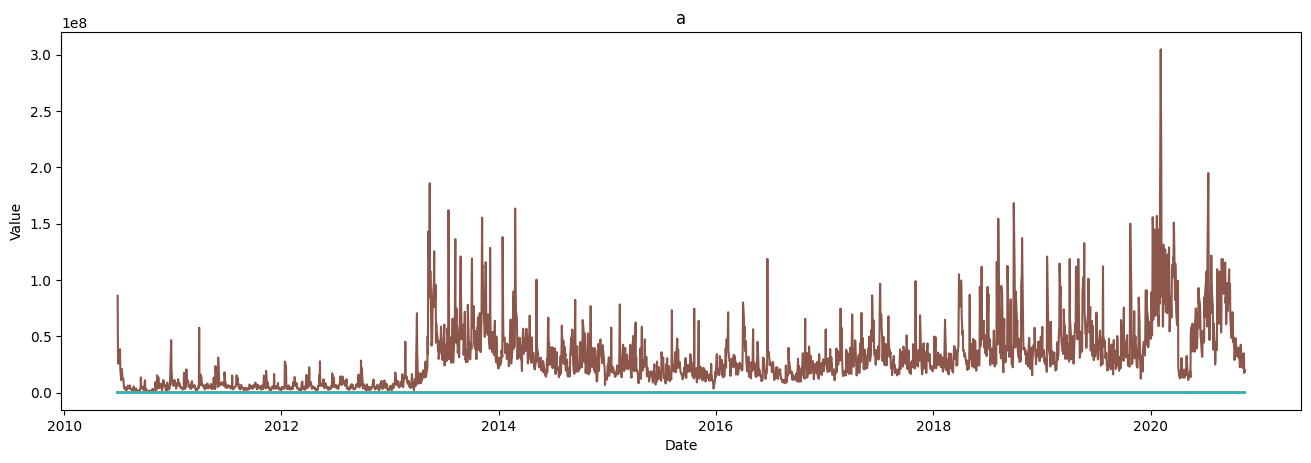

In [17]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df, x=df.index, y=df.values, title='a')    

# time Series Analysis

## Seasonal Plot 

<IPython.core.display.Javascript object>


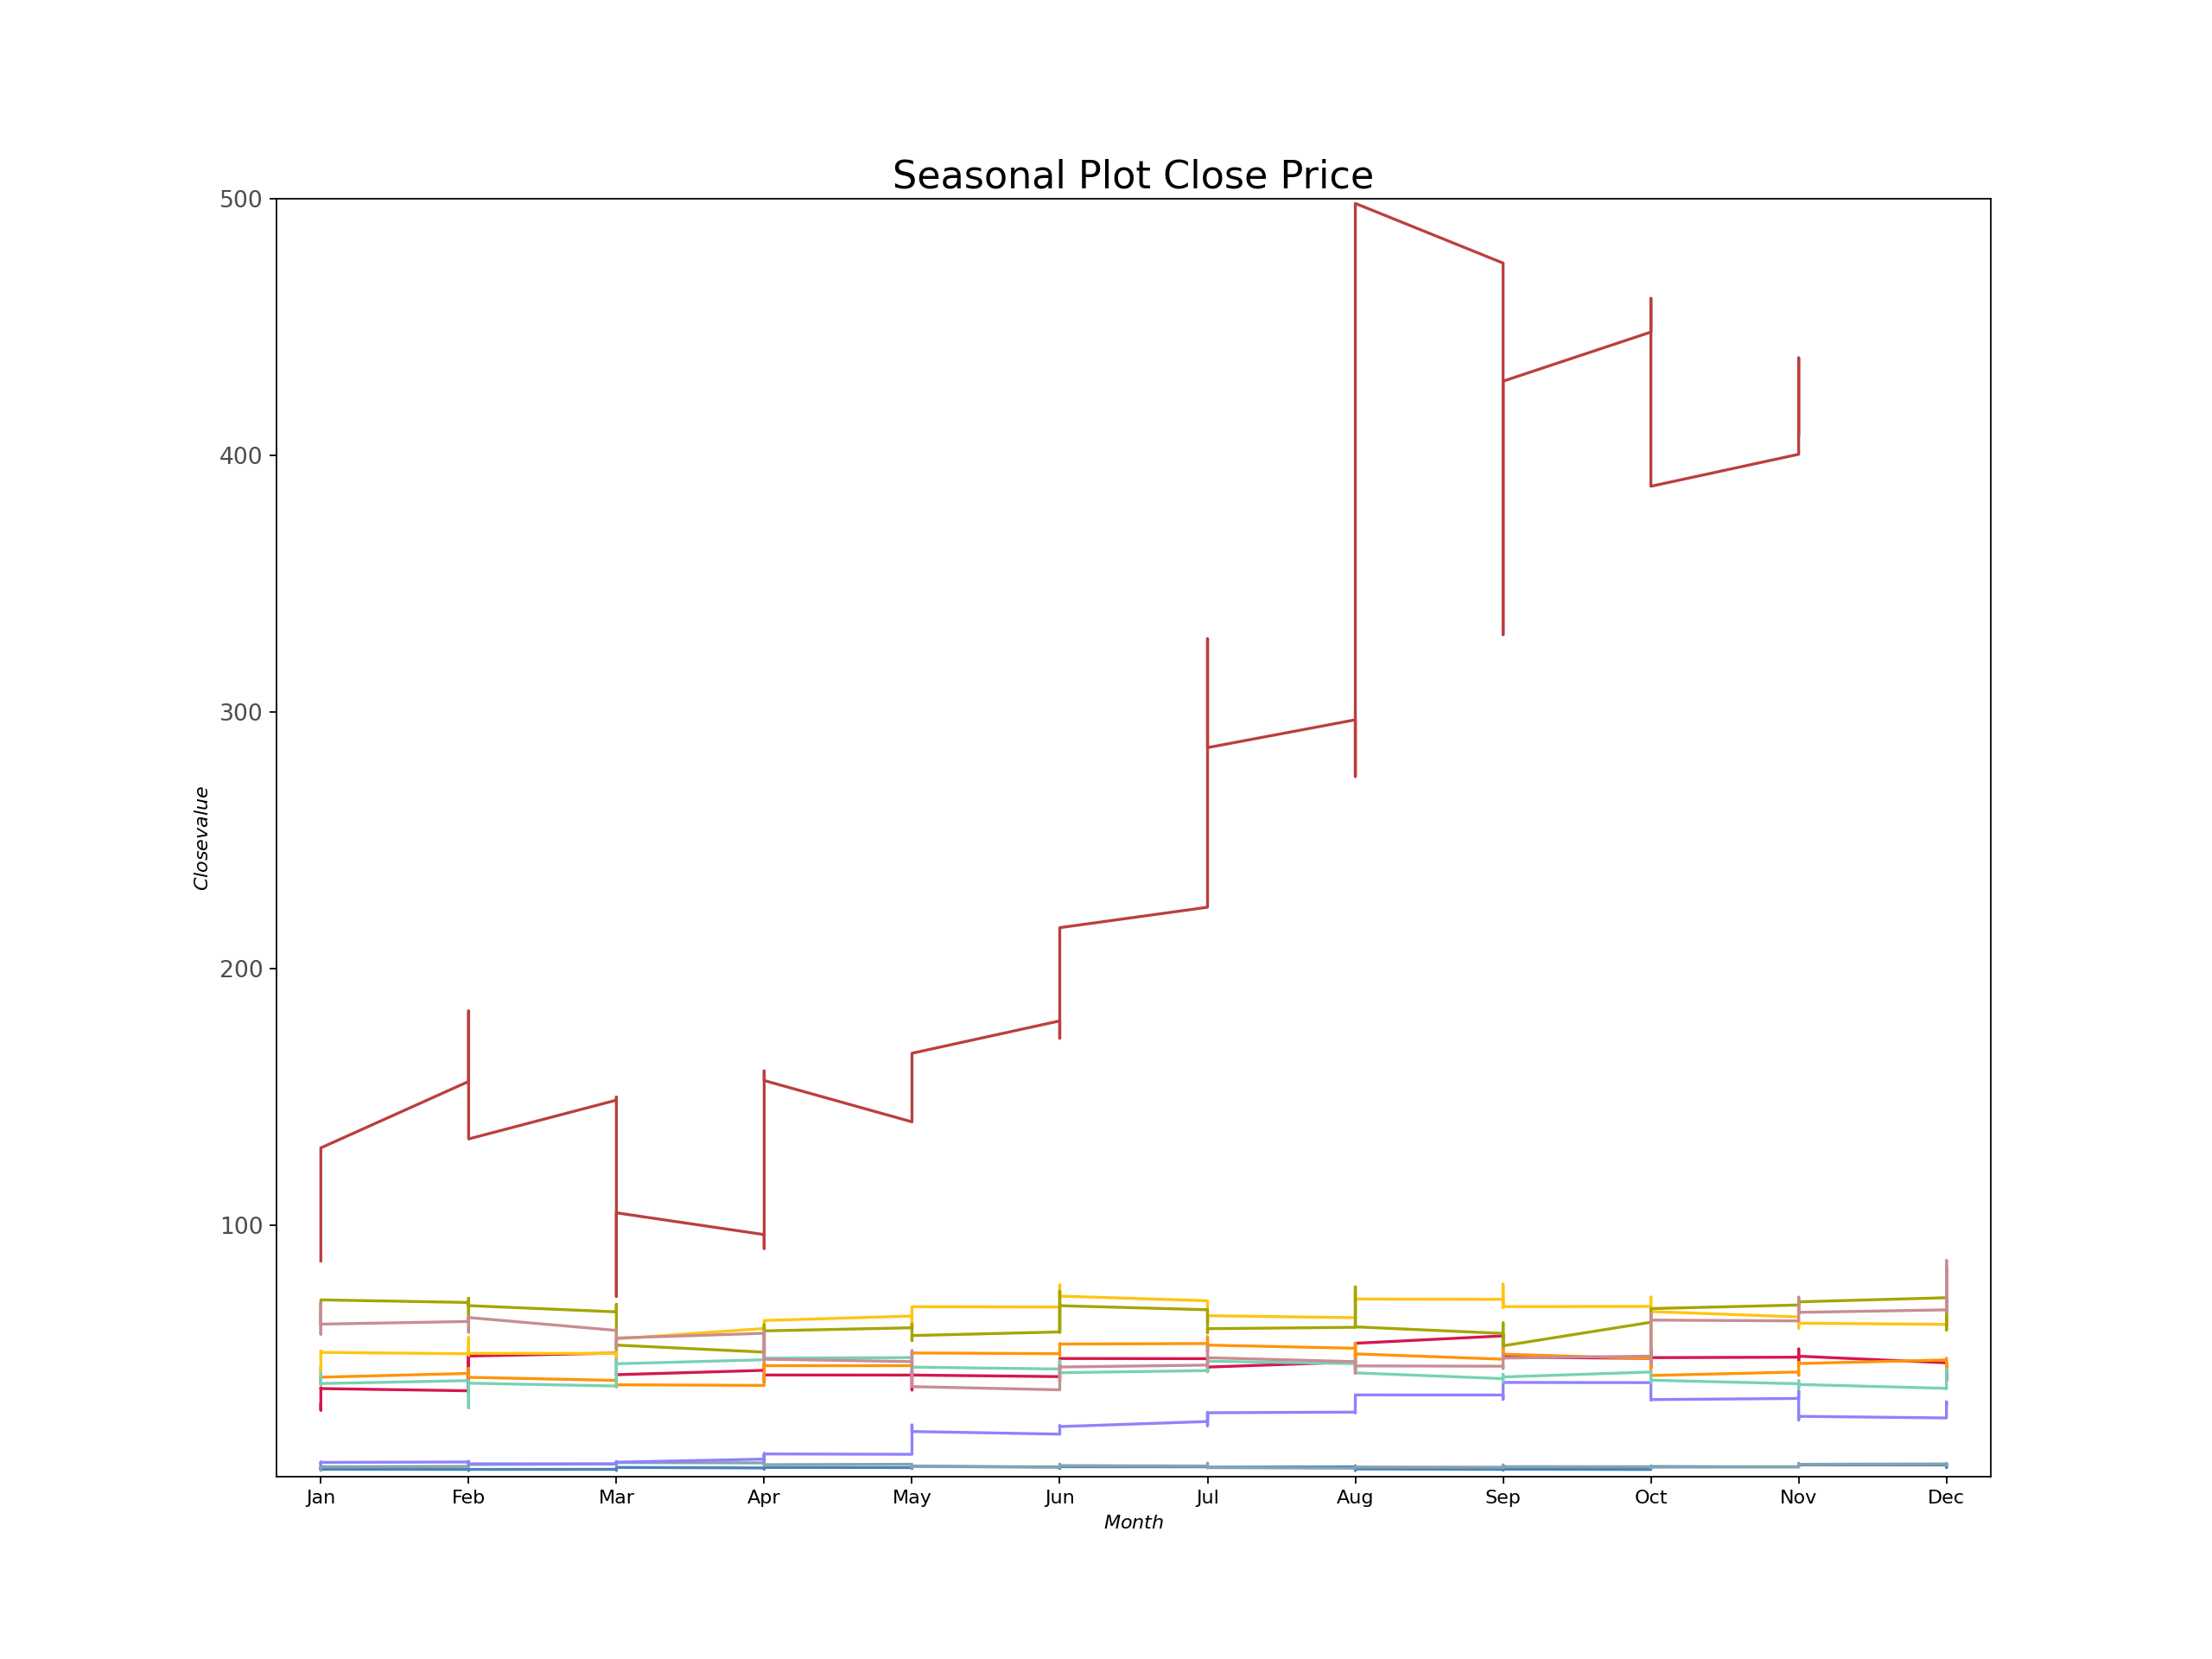

In [82]:
df = pd.read_csv('../Dataset/TSLA_full.csv', parse_dates=['Date'], index_col='Date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()

# Prep Colors
np.random.seed(200)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# # Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'Close', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'Close'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11.3), ylim=(2, 500), ylabel='$Close value$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot Close Price", fontsize=20)
plt.show()

<IPython.core.display.Javascript object>


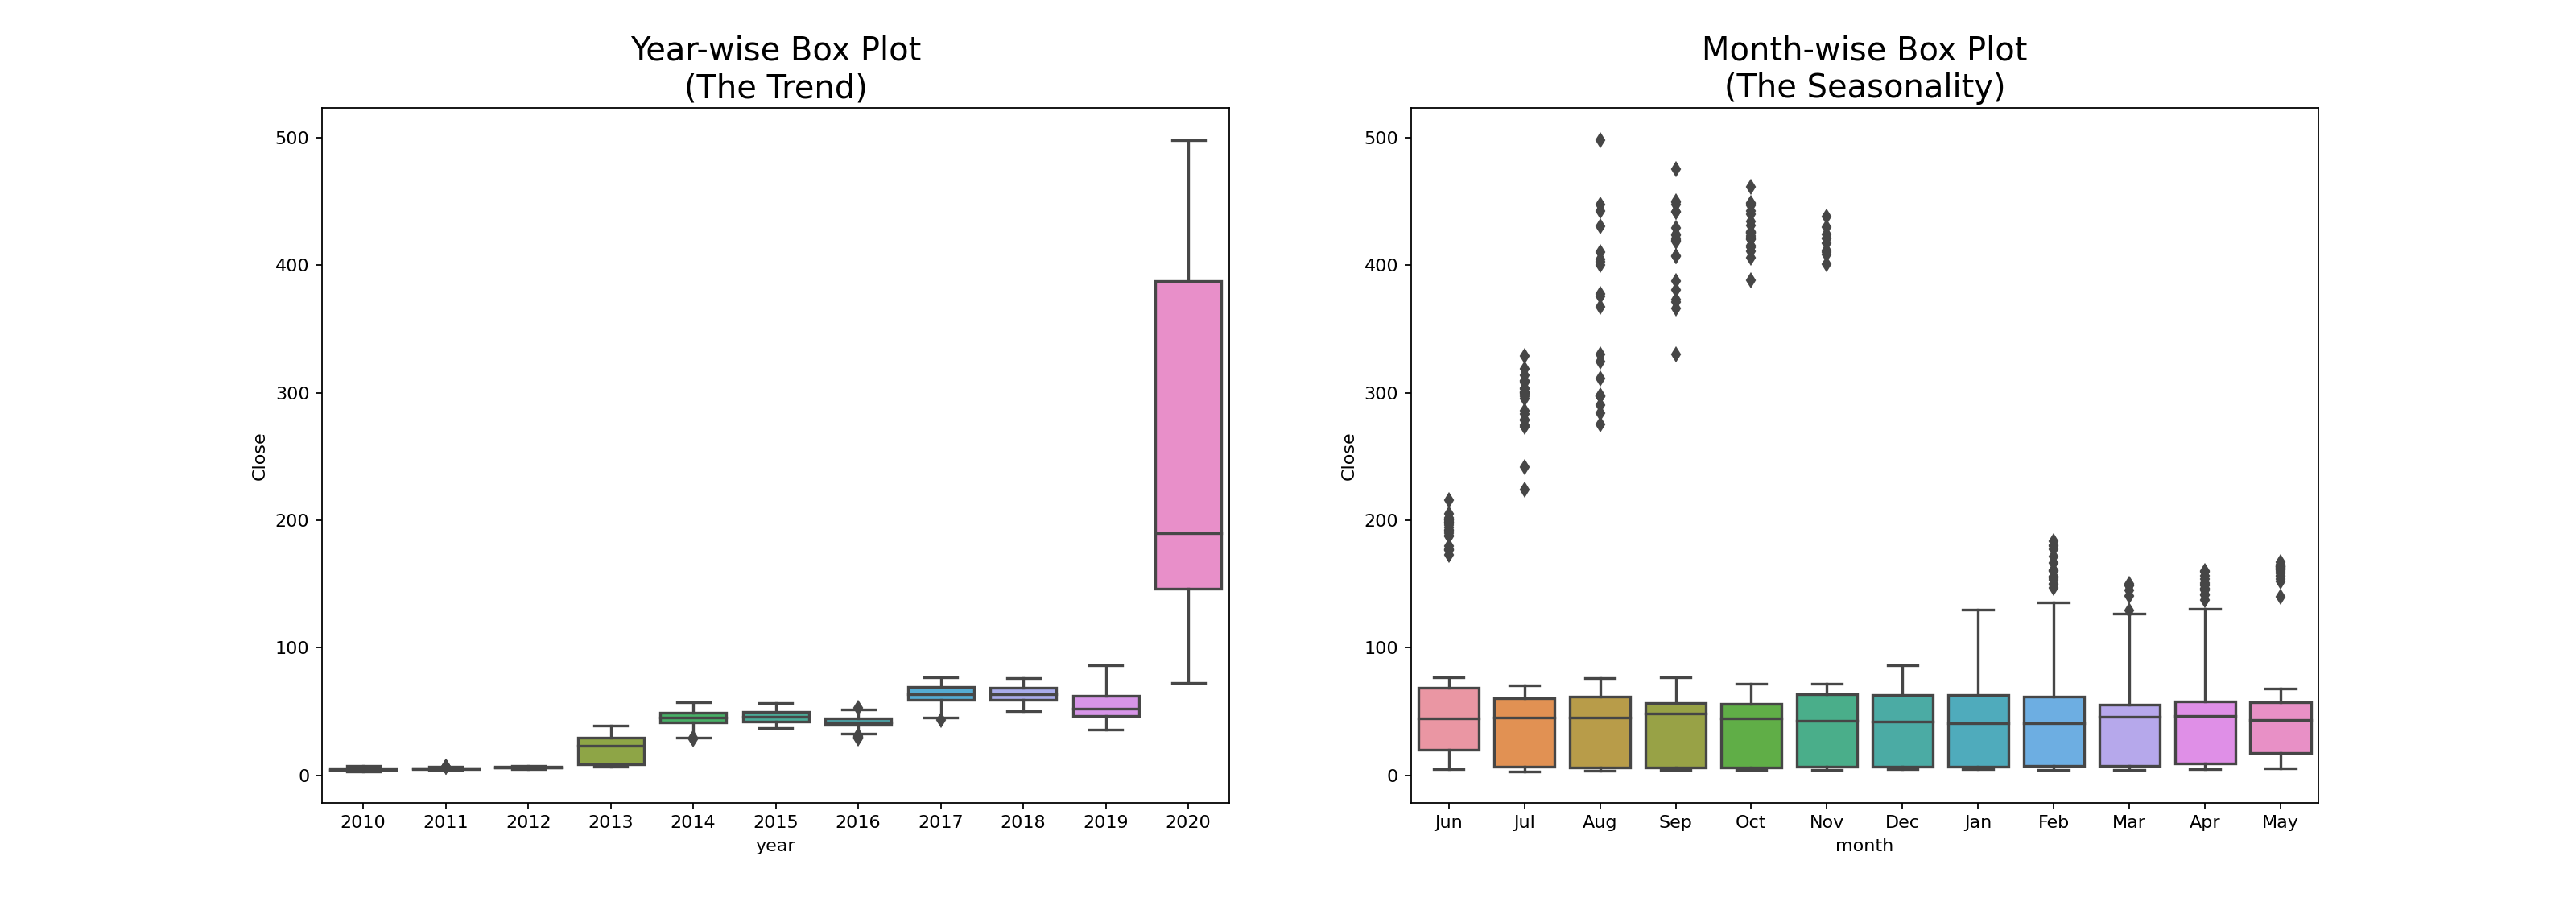

In [60]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Close', data=df, ax=axes[0])
sns.boxplot(x='month', y='Close', data=df)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

Any time series may be split into the following components: Base Level + Trend + Seasonality + Error

<IPython.core.display.Javascript object>


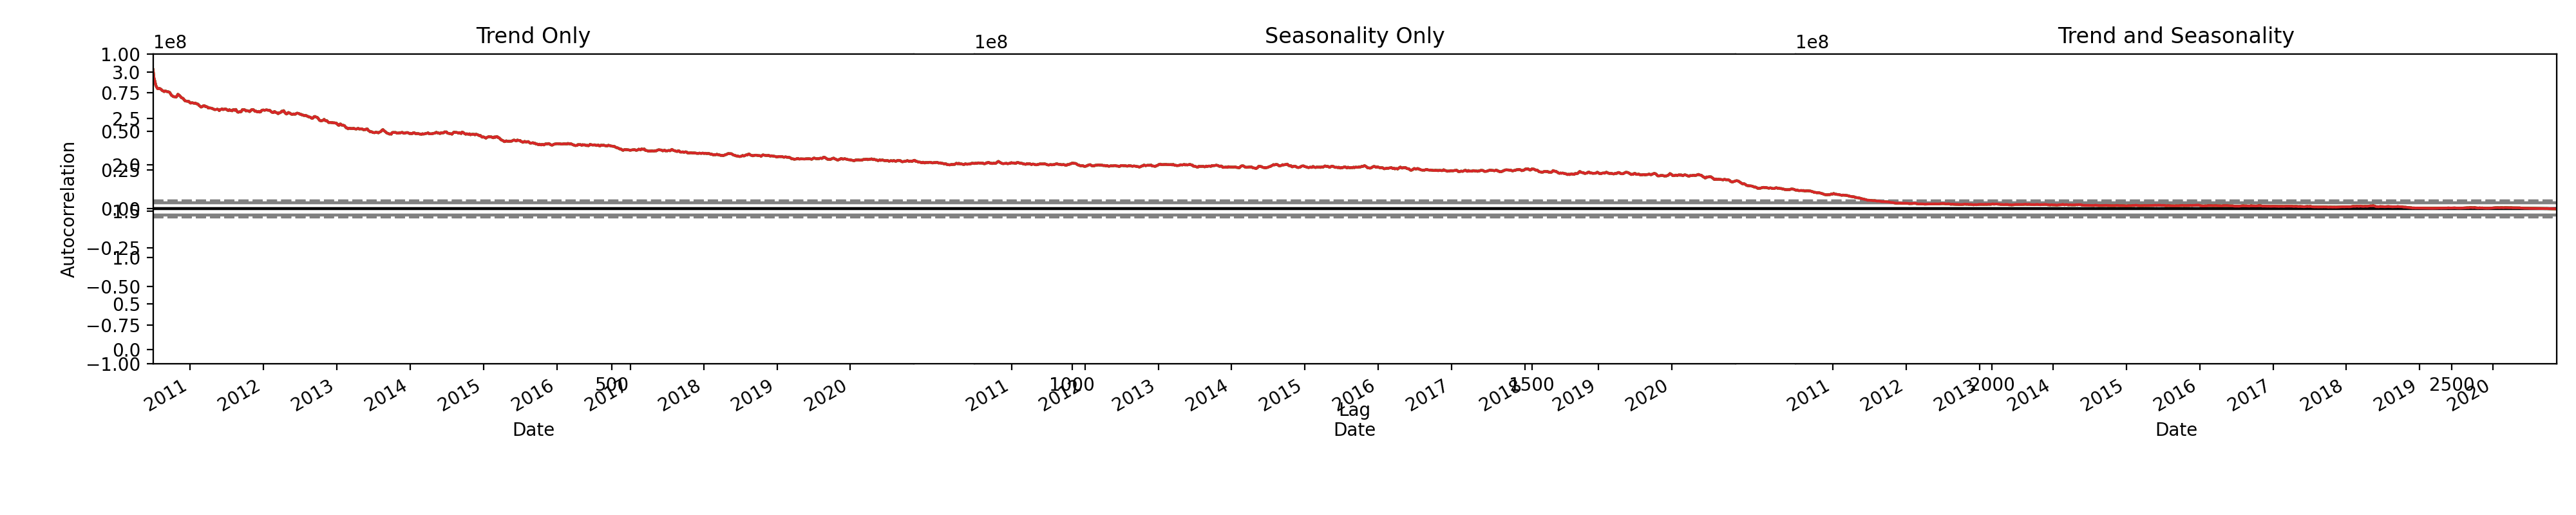

<AxesSubplot:title={'center':'Trend and Seasonality'}, xlabel='Date'>

In [91]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
df = pd.read_csv('../Dataset/TSLA_full.csv', parse_dates=['Date'], index_col='Date')
df.plot(title='Trend Only', legend=False, ax=axes[0])

df.plot(title='Seasonality Only', legend=False, ax=axes[1])

df.plot(title='Trend and Seasonality', legend=False, ax=axes[2])


### Test seasonality

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('../Dataset/TSLA_full.csv', parse_dates=['Date'], index_col='Date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['Close'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['Close'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

In [73]:
# Using scipy: Subtract the line of best fit
from scipy import signal
df = pd.read_csv('../Dataset/TSLA_full.csv', parse_dates=['Date'], index_col='Date')
detrended = signal.detrend(df.values)
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=16)
plt.show()

In [28]:

from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
series.plot()
pyplot.show()

FileNotFoundError: [Errno 2] File b'daily-minimum-temperatures.csv' does not exist: b'daily-minimum-temperatures.csv'

<IPython.core.display.Javascript object>


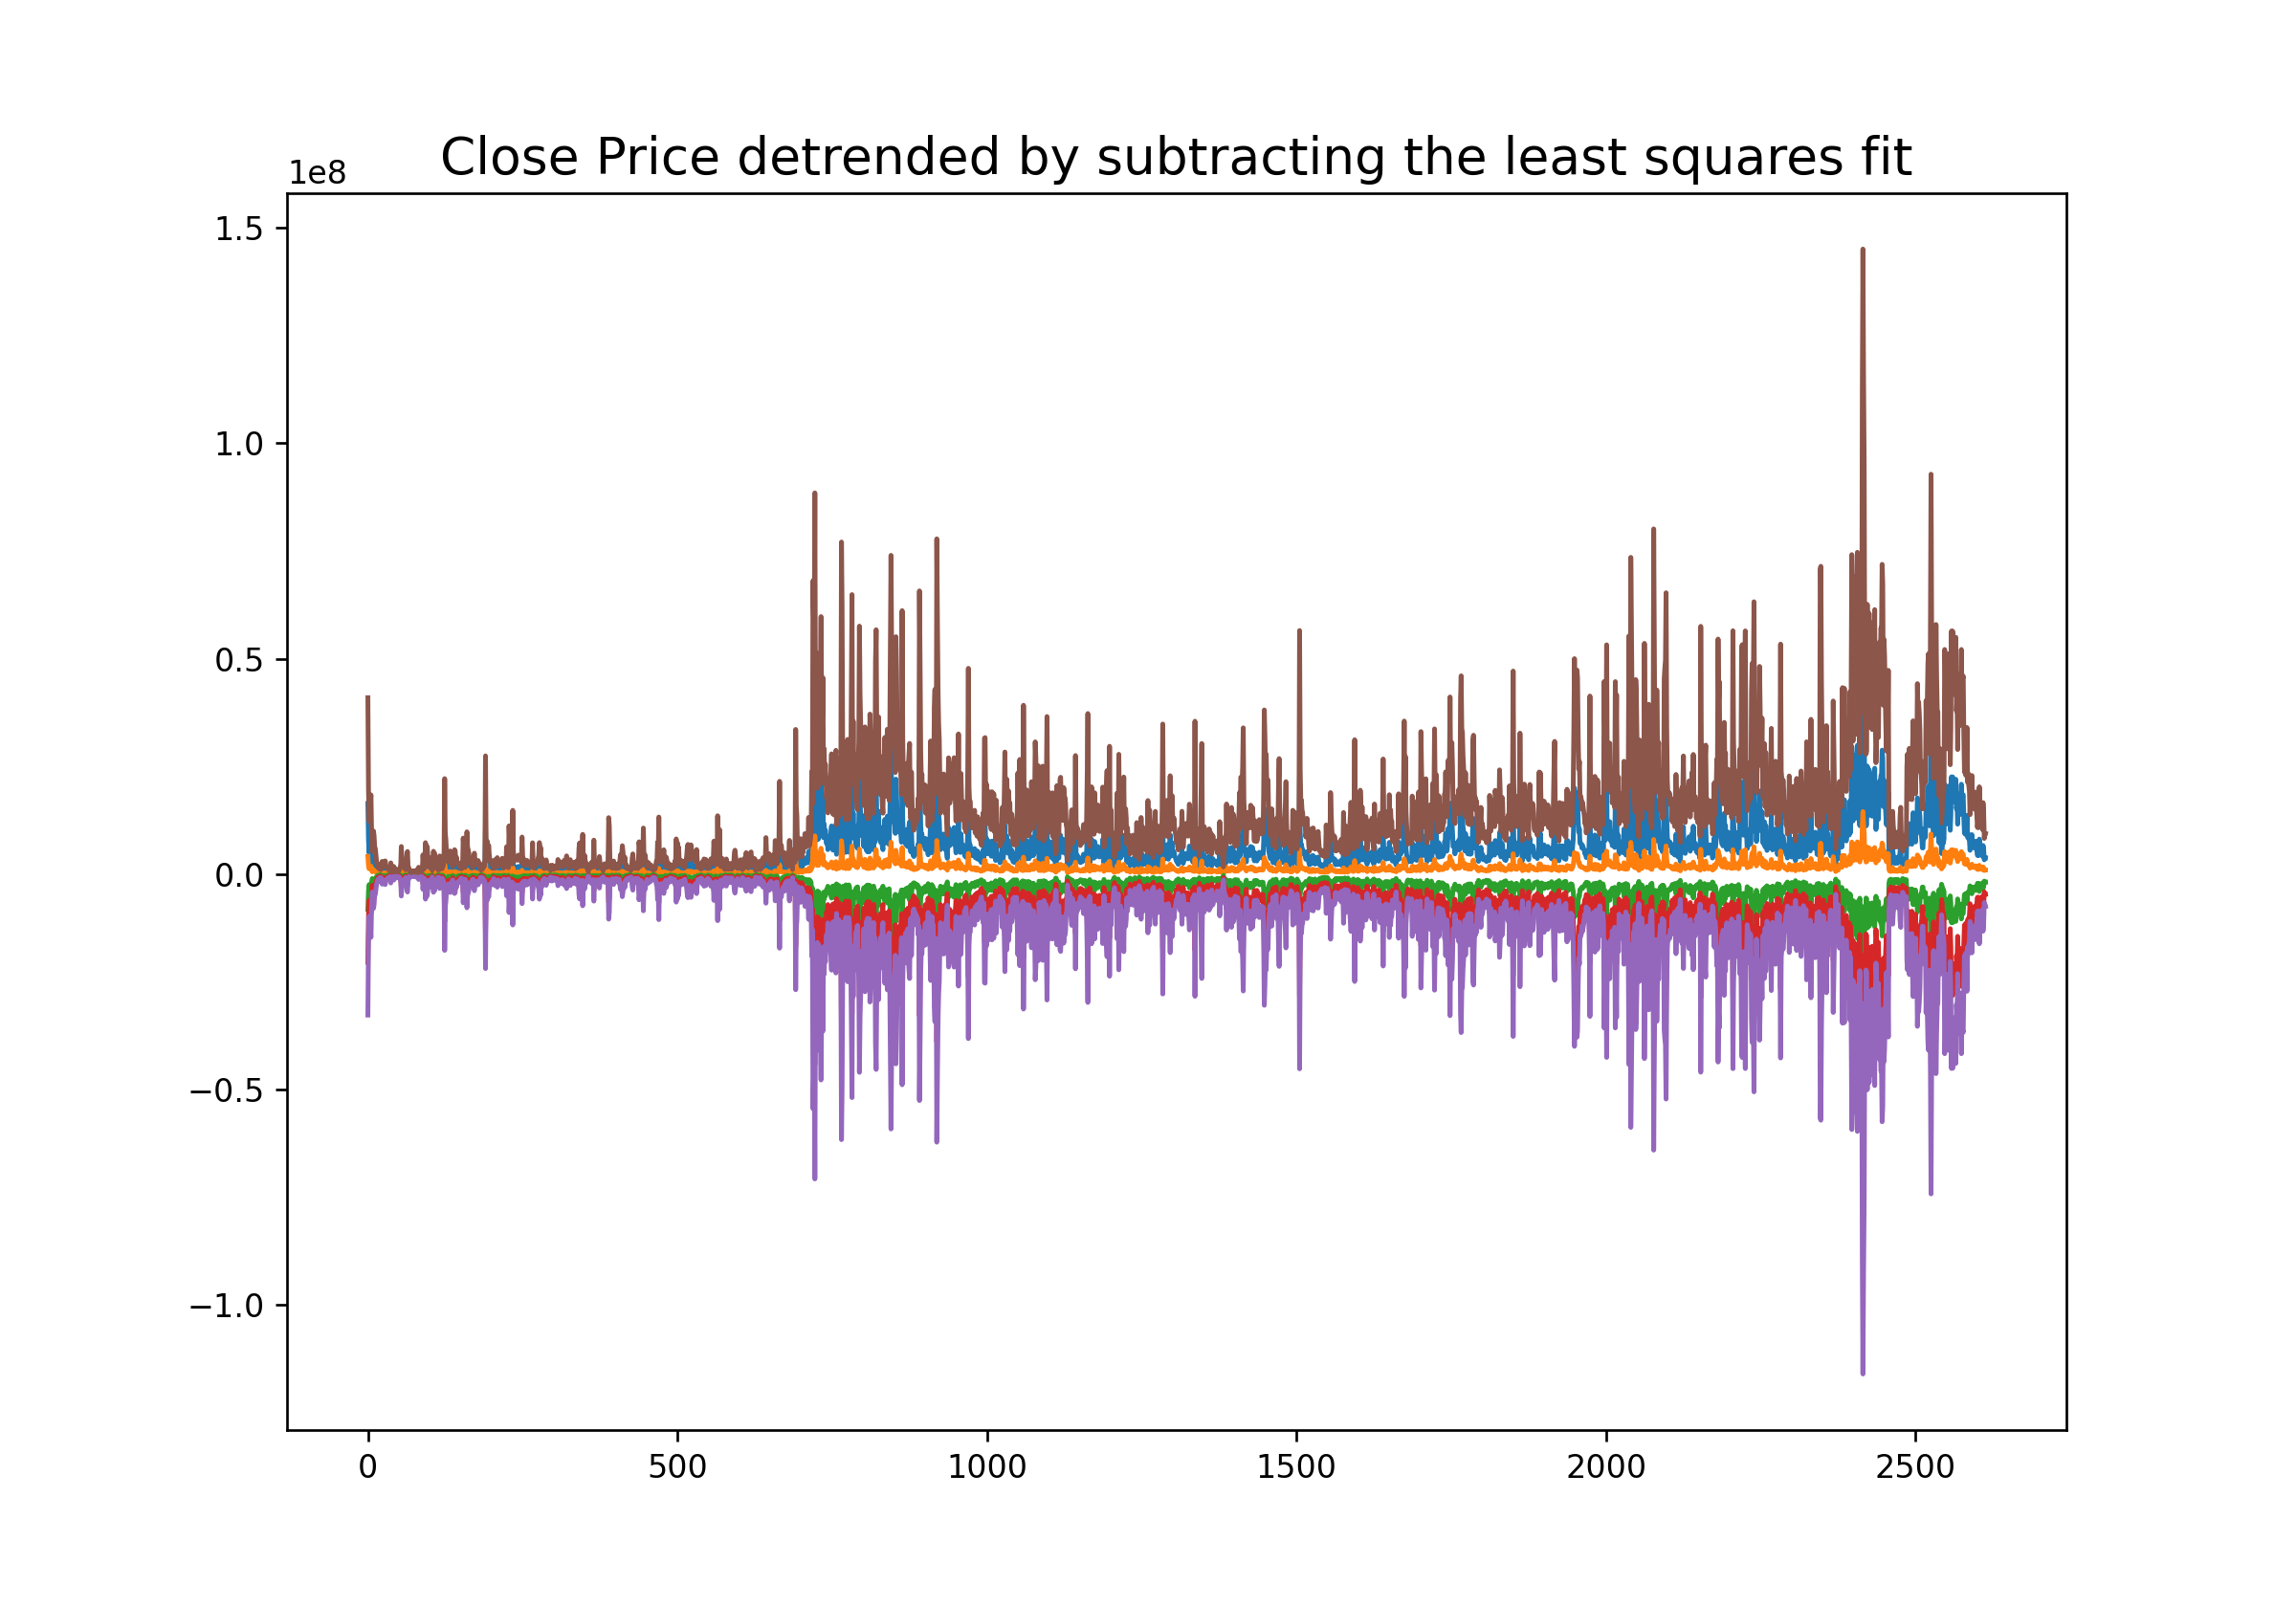

In [80]:
# Using scipy: Subtract the line of best fit
from scipy import signal
df = pd.read_csv('../Dataset/TSLA_full.csv', parse_dates=['Date'], index_col='Date')
detrended = signal.detrend(df.values)
plt.plot(detrended)
plt.title('Close Price detrended by subtracting the least squares fit', fontsize=16)
plt.show()

## Smooth

<IPython.core.display.Javascript object>


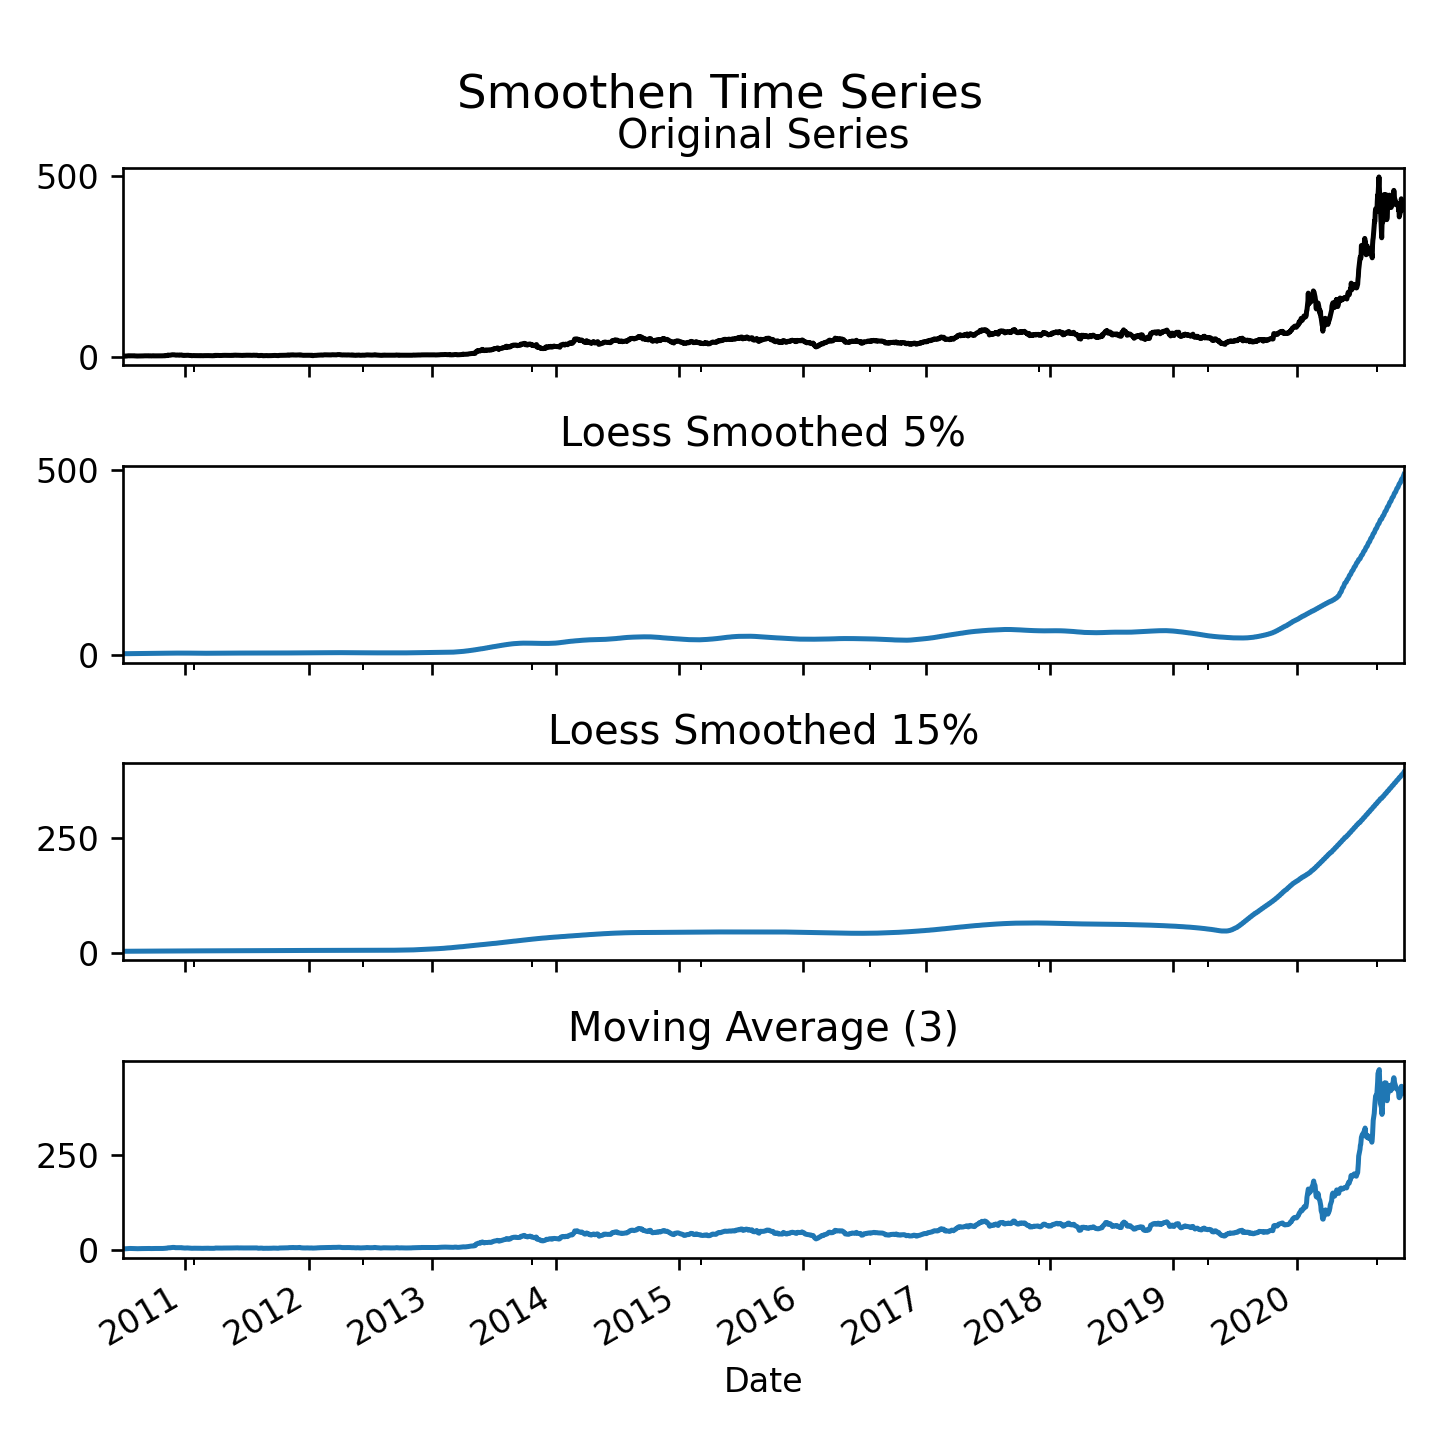

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matpl

In [111]:
from statsmodels.nonparametric.smoothers_lowess import lowess
df_orig = pd.read_csv('../Dataset/TSLA_full.csv', parse_dates=['Date'], index_col='Date')

# 1. Moving Average
df_ma = df_orig['Close'].rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)

df_loess_5 = pd.DataFrame(lowess(df_orig['Close'], np.arange(len(df_orig['Close'])), frac=0.05)[:, 1], index=df_orig.index, columns=['Close'])
df_loess_15 = pd.DataFrame(lowess(df_orig['Close'], np.arange(len(df_orig['Close'])), frac=0.15)[:, 1], index=df_orig.index, columns=['Close'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(6, 6), sharex=True, dpi=120)
df_orig['Close'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['Close'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['Close'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('Smoothen Time Series', y=0.95, fontsize=14)
plt.tight_layout() 

plt.show()
